## Wstęp

Celem ćwiczenia jest poznanie praktycznego zastosowania wybranych modeli barw (RGB, HSV, YUV, YIQ, YCbCr), podstawowej obsługi biblioteki OpenCV (https://docs.opencv.org/master/index.html) i kilku metod przekształcania obrazu.

### Wczytanie obrazu

Pierwszym krokiem jaki należy przedsięwziąć jest oczywiście zaimportowanie niezbędnych bibliotek.
W tej instrukcji będziemy korzystali z biblioteki opencv-python (cv2), matplotlib i numpy.

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (18,10)  # Ustawienie rozmarów wyświetlanych obrazów

Aby załadować i wyświetlić obraz w notebooku należy wywołać poniższą komórkę.
W instrukcji korzystamy z biblioteki matplotlib, aby możliwe było wyświetlanie obrazów w notebooku.
Alternatywnie można wywołać zakomentowany ciąg instrukcji, który wyświetli obraz w osobnym oknie.

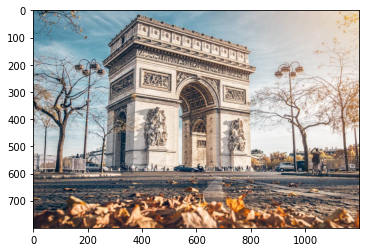

In [2]:
image = cv.imread("images/example.jpg")
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))


# cv.imshow("Jaki ładny obrazek!", image)
# cv.waitKey(0)
# cv.destroyAllWindows()

No dobrze, ale w jaki sposób w programie jest ten obrazek przechowywany? Sprawdźmy to:

In [3]:
print(type(image), image.shape)
print(type(image[0,0,0]))

<class 'numpy.ndarray'> (800, 1200, 3)
<class 'numpy.uint8'>


Widzimy, że funkcja `cv.imread` zwróciła macierz (numpy i klasa ndarray jest jedną z popularniejszych bibliotek stworzonych do operacji macierzowych)
o wymiarach 800x1200x3 zawierającą 8 bitowe wartości (najczęściej są to wartości całkowite, ale do niektórych operacji bardziej przydatne są liczby zmiennoprzecinkowe z zakresu <0,1>). Jak łatwo się domyślić, pierwszy wymiar macierzy odnosi się do wysokości obrazka, drugi do jego szerokości, a trzeci (i tu może być trudniej) do trzech kolorów składowych - niebieskiego, zielonego i czerwonego (BGR). Alternatywne (i częściej) stosuje się jednak odwrotną kolejność bajtów (RGB). W związku z tym, że funkcja `plt.imshow` przyjmuje RGB potrzebna była konwersja (stąd `cv.cvtColor(image, cv.COLOR_BGR2RGB)`). Teraz pytanie za 100 pkt. (tak naprawdę to nie) - czy format pliku wpływa na to w jaki sposób reprezentowane są dane? Oczywiście nie - obraz jest dekodowany przez bibliotekę i prezentowany programiście właśnie w takiej formie, mimo że sposób zapisu danych w pliku jest różny (można skorzystać z komendy systemowej hexdump i md5sum).

<class 'numpy.ndarray'> (800, 1200, 3)


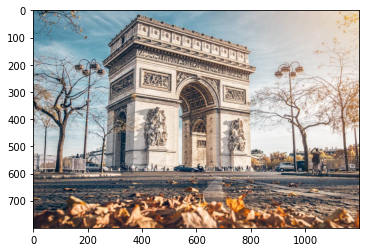

In [4]:
image2 = cv.imread("images/example.png")
plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))
print(type(image2), image2.shape)

Dla wygody zmieńmy kolejność bajtów w macierzy na stałe:

In [5]:
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

Poniżej przedstawiono kilka fragmentów kodu, które ułatwią korzystanie z biblioteki numpy:

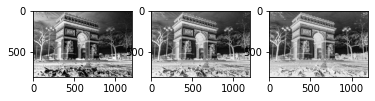

In [11]:
image_copy = image.copy()
fig, ax = plt.subplots(1, 3)
ax[0].imshow(image_copy[:, :, 0], cmap="Greys")  # or Reds
ax[1].imshow(image_copy[:, :, 1], cmap="Greys")  # or Greens
ax[2].imshow(image_copy[:, :, 2], cmap="Greys")  # or Blues

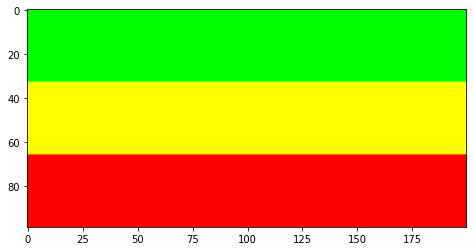

In [12]:
flag = np.empty((99, 200, 3), dtype=float)
for x in range(99):
    for y in range(200):
        if x < 33:
            flag[x, y, :] = [0, 1, 0]
        elif x < 66:
            flag[x, y, :] = [1, 1, 0]
        else:
            flag[x, y, :] = [1, 0, 0]
            
plt.figure(figsize = (8,4))
plt.imshow(flag)

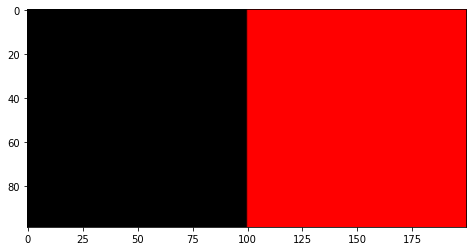

In [13]:
flag = np.empty((99, 200, 3), dtype=float)
flag[:, :100, :] = [0, 0, 0]
flag[:, 100:200, :] = [1, 0, 0]
            
plt.figure(figsize = (8,4))
plt.imshow(flag)

### Modele barw

#### 1. RGB

Pierwszy i najważniejszy model barw już poznaliśmy - jest to RGB!

Model RGB służy głównie do opisu procesu wyświetlania obrazu barwnego na monitorze. Obraz  na  monitorze  niezależnie  od  tego  czy  jest  to  monitor  CRT,  LCD  czy  plazmowy powstaje  jako  wynik  kombinacji  efektów  procesów świecenia  bardzo  małych  punktów, emitujący światło  w  trzech  kolorach  podstawowych,  czerwonym,  zielonym  i  niebieskim.  W procesie wyświetlania obrazu zachodzi, więc sumowanie barw i w związku z tym  model ten nosi  często  nazwę  modelu  addytywnego.  Najczęściej  model RGB  przedstawia  się  w  postaci sześcianu  jednostkowego  o  krawędziach  położonych  na  trzech  osiach  układu  współrzędnych prostokątnych,  które  reprezentują  trzy  barwy  podstawowe.  W  modelu RGB  barwę definiuje się, więc jak przy pomocy trójki liczb (r, g, b), gdzie r,b,g należy do przedziału <0,1> (przy próbce szerokości 8 bitów wartość 255 odpowiada górnej granicy przedziału).

![](images/colorcube.jpg)

#### 2. HSV

Model HSV  (Hue,  Saturation,  Value)  znacznie  lepiej  niż  model RGB  nadaję  się  do opisania  barwy  zadanej  w  postaci  próbki  lub  barwy  „wyobrażanej”.  Model  ma  postaćodwróconego  stożka  wypełnionego  barwnymi  punktami  (Rys.  3).  Barwa  opisywana  jest  w tym  przypadku  przy  pomocy  trzech  liczb  (h,  s,  v),  przy  czym h,  s,  v∈[0,  1].  Pierwsza składowa h określa odcień barwy i jej zmiana o 0 do 1 odpowiada to zmianie od czerwonego przez żółty,  zielony,  cyjanowy,  niebieski,  fioletowy  i  z  powrotem  do  czerwonego  (tak  jak pokazują strzałki na rysunku 3.). Druga składowa s reprezentuje nasycenie barwy i jej zmiana od 0 do 1 odpowiada zmianie od szarości do barwy czystej. Trzeci element modelu, składowa v opisuje jasność barwy, 0 reprezentuje barwę najciemniejszą a 1 najjaśniejszą.

Typowy algorytm ustalania składowych opisu barwy zadanej na przykład w postaci próbki jest taki: 

- Ustawić wszystkie składowe na 1
- Zmieniać składową h (odcień) tak, aby osiągnąć wrażenie maksymalnego podobieństwa z analizowaną próbką,
- Zmieniać s (nasycenie), 
- Zmieniać v (jasność) 

<img src="images/hsv.png" alt="drawing" width="200"/>

Niżej znajduje się przykład wyboru koloru w modelu HSV:

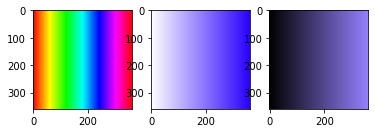

In [14]:
fig, ax = plt.subplots(1, 3)

hsvimg = np.empty((360, 360, 3), dtype=np.float32)
hsvimg[:,:,0] = np.linspace(0, 360, 360)
hsvimg[:,:,1] = 1
hsvimg[:,:,2] = 1
rgbimg1 = cv.cvtColor(hsvimg, cv.COLOR_HSV2RGB)
ax[0].imshow(rgbimg1) # wybieram  kolor -> 250

hsvimg[:,:,0] = 250
hsvimg[:,:,1] = np.linspace(0, 1, 360)
hsvimg[:,:,2] = 1
rgbimg2 = cv.cvtColor(hsvimg, cv.COLOR_HSV2RGB)
ax[1].imshow(rgbimg2) # wybieram  nasycenie 180 -> 180/360 = 0.5 

hsvimg[:,:,0] = 250
hsvimg[:,:,1] = 0.5
hsvimg[:,:,2] = np.linspace(0, 1, 360)
rgbimg3 = cv.cvtColor(hsvimg, cv.COLOR_HSV2RGB)
ax[2].imshow(rgbimg3) # wybieram  jasnosc

#### 3. Modele luminacja - chrominancja 

Modele  luminacja  –  chrominancja  najczęściej  przedstawiane  są  w  postaci  zależności pozwalających  przeliczyć  wartości  składowych  określających  barwę  w  kategoriach  modelu RGB  na  inne  trzy  liczby.  Pierwsza  z  nich  nosi  nazwę  luminancji  i  zwykle  oznaczana  jest literąY. Luminancja  określa  jasność  punktów  obrazu  i  wyświetlona  w  stopniach  szarości bardzo  dobrze  prezentuje  obraz  barwny  jako  monochromatyczny.  Pozostałe  dwie  składowe, różnie  definiowane  i  oznaczane,  noszą  nazwę  chrominancji  i  zawierają  informację,  która łącznie z luminancja określa obraz barwny. Poniżej podano wzory opisujące trzy najbardziej popularne modele:

- Model YUV (telewizja PAL)

$$
\begin{bmatrix} 
    Y \\
    U \\
    V \\
\end{bmatrix}
=
\begin{bmatrix} 
    0.229 & 0.587 & 0.114 \\
    -0.146 & -0.288 & -0.439 \\
    0.617 & -0.517 & 0.100 
\end{bmatrix}
\begin{bmatrix} 
    R \\
    G \\
    B \\
\end{bmatrix}
$$


- Model YIQ (telewizja NTSC)

$$
\begin{bmatrix} 
    Y \\
    I \\
    Q \\
\end{bmatrix}
=
\begin{bmatrix} 
    0.229 & 0.587 & 0.114 \\
    -0.168 & -0.257 & -0.321 \\
    0.212 & -0.528 & 0.311 
\end{bmatrix}
\begin{bmatrix} 
    R \\
    G \\
    B \\
\end{bmatrix}
$$

- model YCbCr (telewizja HDTV)

$$
\begin{bmatrix} 
    Y \\
    Cb \\
    Cr \\
\end{bmatrix}
=
\begin{bmatrix} 
    0.229 & 0.587 & 0.114 \\
    -0.168 & -0.331 & -0.500 \\
    0.500 & -0.418 & 0.082
\end{bmatrix}
\begin{bmatrix} 
    R \\
    G \\
    B \\
\end{bmatrix}
$$


Można  zauważyć, że  wszystkie  trzy  modele  opisane  są  jako  przekształcenia  liniowe. Można sprawdzić także, że dla każdego z nich istnieje przekształcenie odwrotne pozwalające przeliczyć  barwę  ze  składowych  luminancja  -  chrominancja  z  powrotem  na  składowe w  modelu RGB. Trzecia wspólna  cecha  to  fakt, że  luminancja Y  dla  każdego  modle  wyrażona jest tak samo, przy pomocy równania:

$$Y = 0.229R + 0.587G + 0.114B$$

### Filtracja

Filtracja obrazów pozwala na podkreśleniu, lub usunięcie pewnych cech obrazu. Najczęściej używa jej do rozmycia/wyostrzenia obrazu (redukcja szumu i wykrywanie krawędzi). Do liniowej filtracji używa się tzw. operacji splotu (konwolucji). Algorytm konwolucji polega na wyznaczeniu nowej wartości piksela poprzez uśrednienie (ważone) pikseli go otaczających. Wagi do średniej są brane z tak zwanej maski filtru (ang. kernel), która jest macierzą kwadratową o nieparzystej liczbie wierszy/kolumn. Wartość znajdująca się w środku macierzy odpowiada przekształcnemu pikselowi (jest to waga dla niego).


<img src="images/splot.png" alt="drawing" width="500"/>

Biblioteka OpenCV oczywiście implementuje operację splotu. Poniższy kawałek kodu wyświetli rozmyty obraz - jest to tak zwana filtracja dolnoprzepustowa (filtr nie przepuszcza nagłych zmian koloru pikseli), a ten konkretny przykład maski to tzw. filtr gaussowski.

Uwaga: funkcja `filter2d` mnoży odpowiednie piksele przez elementy maski, ale nie wykonuje dzielenia (stąd `kernel.sum()`)

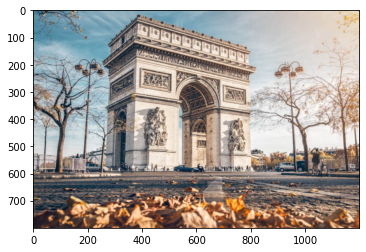

In [16]:
kernel = [
    [2, 4, 2],
    [4, 8, 4],
    [2, 4, 2],
]
kernel = np.asarray(kernel)
kernel = kernel/kernel.sum()
filtered_image = cv.filter2D(image, -1, kernel=kernel) 

plt.imshow(filtered_image)

#### Więcej o OpenCV

Biblioteka OpenCV jest potężnym zbiorem narzędzi do przetwarzania statycznych obrazów i filmów. W niniejszej instrukcji pokazano jedynie kilka funkcji. Na przykład poniższy grupuje piksele względem koloru algorytmem K-means - obraz wyjściowy składa się tylko z K (5) kolorów. Taka technika może być wykorzystywana do segmentacji obrazu (chociaż biblioteka OpenCV implementuje również inteligentniejsze rozwiązania tego problemu), czy redukcji rozmiarów zdjęcia. Ta techinka niesie również wiele walorów estetycznych.

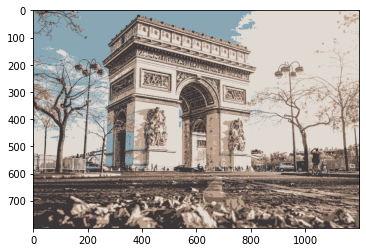

In [17]:
img = image.reshape((-1,3))
img = np.float32(img)

K = 5
criteria = (
    cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER,
    10,
    1.0)

ret, label, center = (
    cv.kmeans(
        img, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
)

center = np.uint8(center)
res = center[label.flatten()]
res = res.reshape((image.shape))
plt.imshow(res)

Biblioteka pozwala również na rysowanie histogramów (histogram obrazu pokazuje rozkład kolorów, czyli odpowiada na pytanie "ile jest pikseli o wartosci 50 kanału czerwonego"). Proszę spojrzeć na histogram obrazu `res` (chodzi o wynik algorytmu K-means - w trzeciej linijce poniższego kodu należy zmienić `image` na `res`) - powinno być na nim widoczne 5 kolorów (15 słupków - piksele mają takie same wartości RGB).

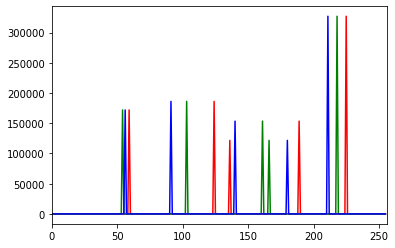

In [18]:
color = ('r','g','b')
for i, col in enumerate(color):
    histr = cv.calcHist([res], [i], None, [256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])

### Zadanka

Zadania mogą być wykonane w formie notebooka (podobnego do tego), lub zwykłego skryptu. W drugim przypadku, program powinien przyjmować potrzebne parametry z zewnątrz (np. `python skrypt.py arg1 arg2`) i wyświetlać wizualne rezulaty w osobnym oknie (patrz: `cv.imshow`).

Każde zadanie powinno znaleźć się w osobnym katalogu i zawierać plik README.md z opisem uruchomienia.


**Zadanie 1. (3.0)**

Filtracja górnoprzepustowa (a.k.a. detektor krawędzi).
Zostosować poniższe maski dla dowolnego obrazka. Uwaga - w przypadku tego filtru nie należy uśredniać macierzy (dzielić przez sumę wartości).

$$h(k,l) = 
\begin{bmatrix} 
    -1 & -1 & -1 \\
    -1 &  8 & -1 \\
    -1 & -1 & -1
\end{bmatrix}$$


**Zadanie 2. (3.5)**

Zastosuj poniższe przekształcenie dla dowolnego obrazka (np. powyższego łuku). Dobrym pomysłem jest przekształcenie obrazu wejściowego do postaci zmiennoprzecinkowej (float). Warto zwrócić uwagę, że niektóre wartosci mogą przekroczyć 1 - należy je przyciąć.
    

$$
\begin{bmatrix} 
    R \\
    G \\
    B \\
\end{bmatrix}
=
\begin{bmatrix} 
    0.393 & 0.769 & 0.189 \\
    0.349 & 0.689 & 0.168 \\
    0.272 & 0.534 & 0.131
\end{bmatrix}
\begin{bmatrix} 
    R \\
    G \\
    B \\
\end{bmatrix}
$$


**Zadanie 3. (4.5)**

Zaimplementować uproszczony schemat toru transmisji obrazu w systemie telewizji cyfrowej:

1. Przeprowadzić konwersję dowolnego obrazka z RGB do YCbCr i wyświetlić oryginalny obraz i poszczególne składowe w odcieniach szarości (ten punkt jest na ocenę 4.0).
2. Przeprowadzić operację downsamplingu na kanałach CbCr. Ten fragment zadania imituje koder - po tej operacji kanał Y i pomniejszone Cb/Cr są "wysyłane" do dekodera.
3. Przeprowadzić operację upsamplingu na macierzach z pkt. 2 (dekoder)
4. Złożyć obraz z otrzymanych w pkt. 2 wartości i oryginalnego kanału Y.
5. Wyświetlić otrzymany obraz i poszczególne składowe w odzieniach szarości.

Operacja downsamplingu polega na zignorowaniu części wartości w celu zmniejszenia rozmiaru macierzy wyjściowej (w telewizji pozwala to na zaoszczędzenie pasma). Poniższy obrazek przedstawia jej ideę:

<img src="images/downsampling.png" alt="drawing" width="500"/>

Operacja upsamplingu jest przeprowadzana w sposób analogiczny:

<img src="images/upsampling.png" alt="drawing" width="500"/>

**Zadanie 4. (5.0)**

Policzyć MSE (Mean Squared Error) pomiędzy obrazkiem wejściowym, a wyjściowym z zadania 3.

$$MSE = \frac{1}{m}\frac{1}{n}\sum_{i=1}^{3}\sum_{j=1}^{n}(X_{ij} - \hat{X_{ij}})^2,$$

gdzie: \
$n$ - liczba pikseli obrazu, \
$m$ - liczba kanałów (jest ich trzy - RGB), \
$X_{ij}$ - wartość j-tego koloru i-tego piksela w obrazie wejściowym, \
$\hat{X_{ij}}$ - wartość j-tego koloru i-tego piksela w obrazie wyjściowym.

### Warto sprawdzić:

1. https://opencv-python-tutroals.readthedocs.io/en/latest/index.html

Część powyższej instrukcji bazuje na ćwiczeniach stworzonych przez dr inż. Jacka Jarnickiego - http://www.zsk.iiar.pwr.wroc.pl/zsk/dyd/dydaktyka/ioc/ i to stamtąd pochodzi większość obrazów.
Zdjęcie łuku triumfalnego zostało zaczęrpnięte z https://www.beltandroad.news/2019/12/03/joint-event-of-icc-africa-commission-and-icc-belt-road-commission/